# O que buscamos encontrar nesses dados?



1.   Quais correlações existem?

*   Existe correlação entre dia da semana e quantidade de views?
*   Existe correlação entre likes e views?


2.   Visualizações de dados

*   Mostrar os vídeos mais vistos
*   Mostrar os vídeos com mais likes





In [ ]:
!pip install isodate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.7 MB/s eta 0:00:00


In [ ]:
# NLP
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud
# Pandas
import pandas as pd
import numpy as np
from dateutil import parser
import isodate

# Visualização
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


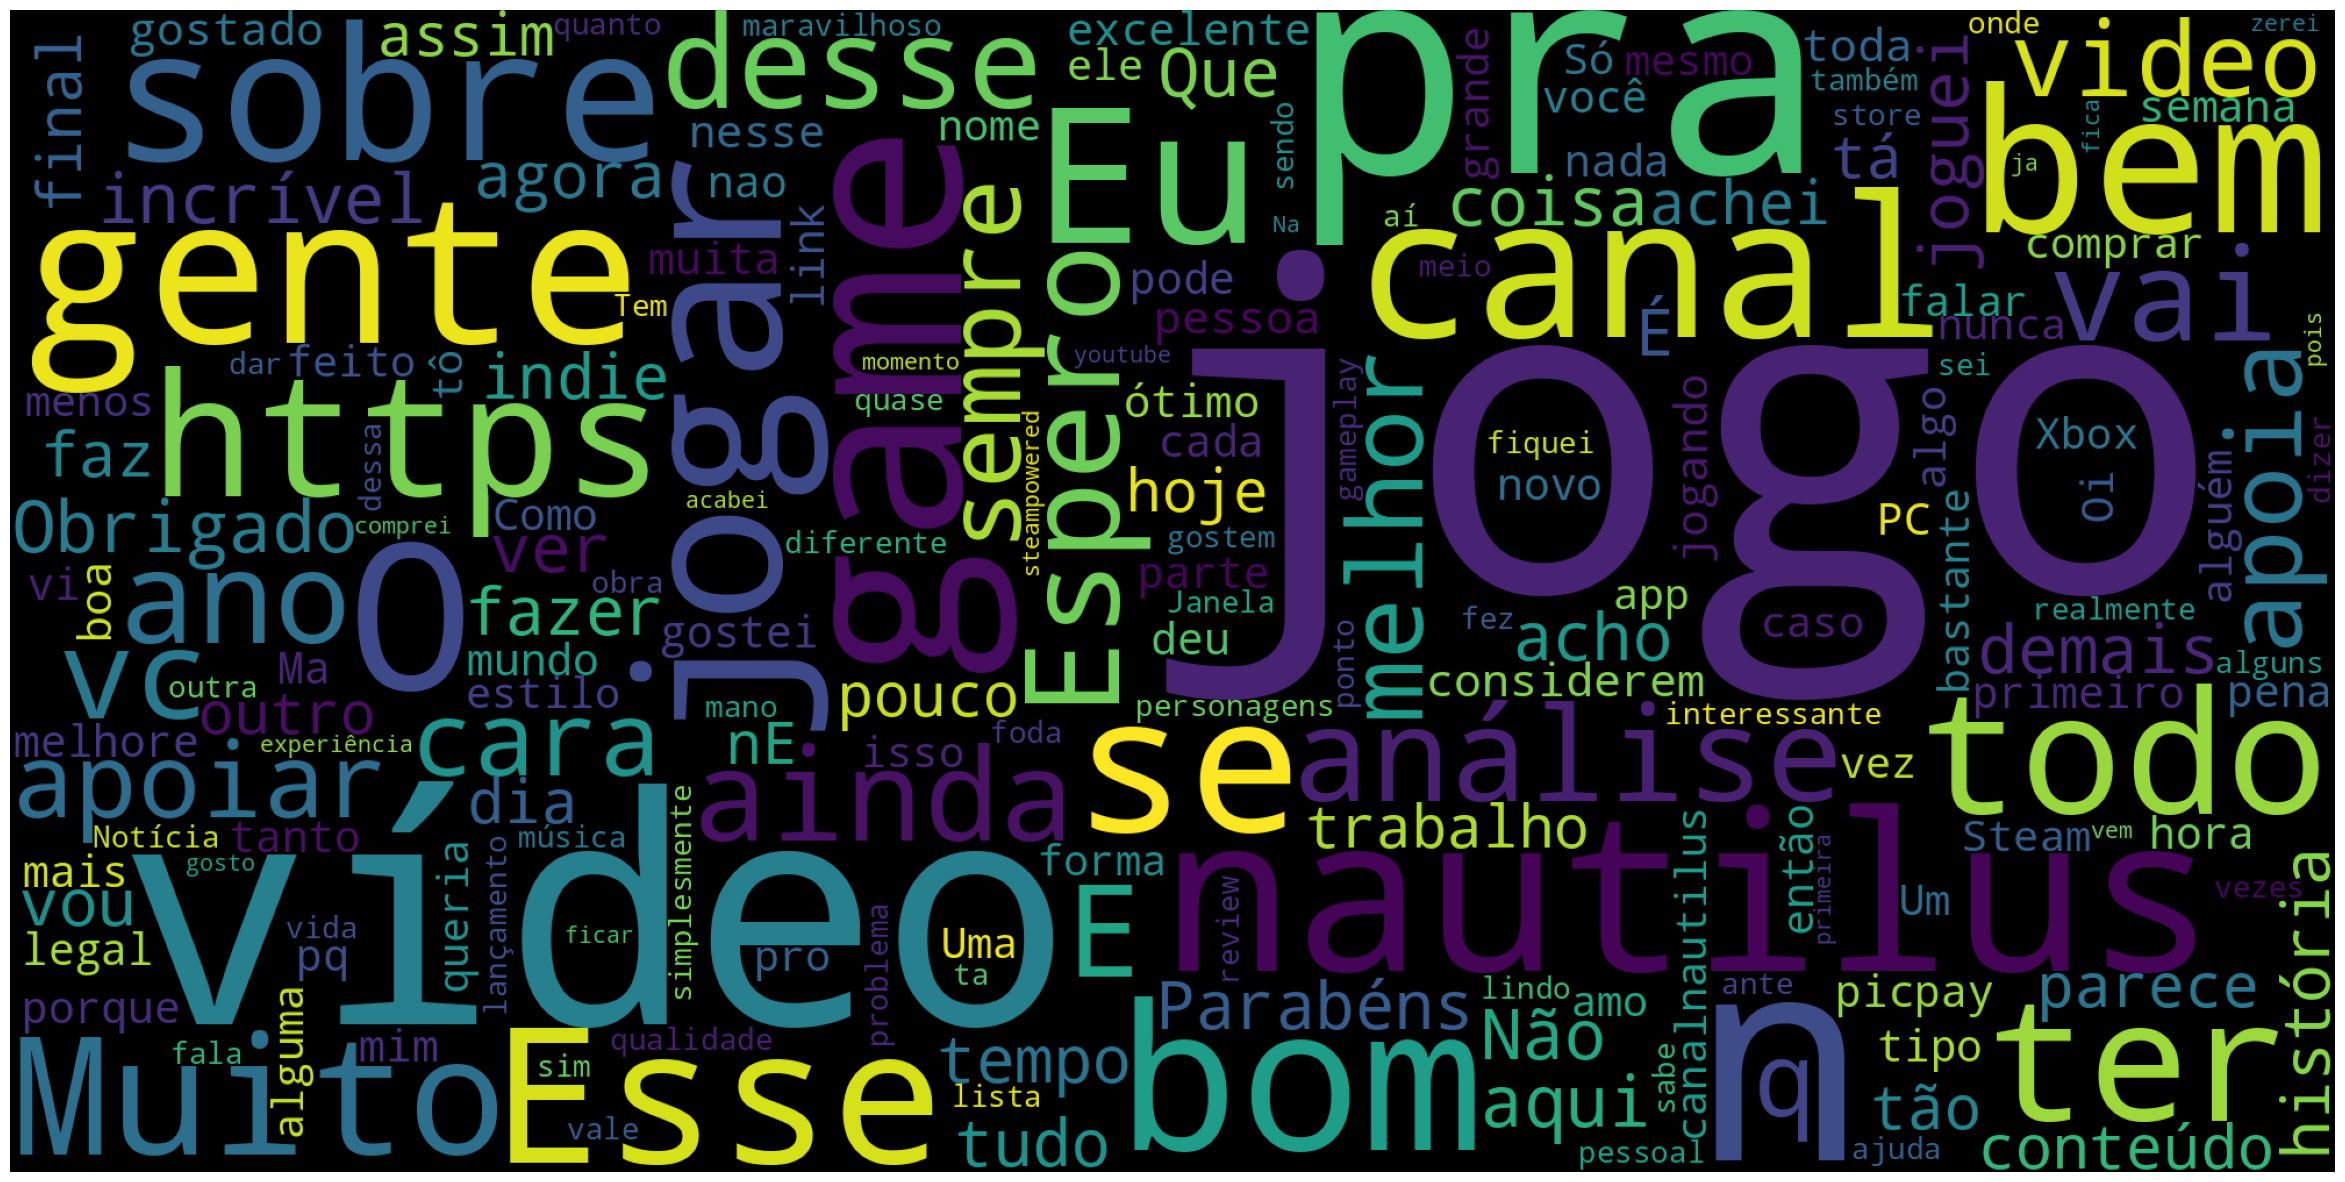

In [ ]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud)
    plt.axis("off");
stop_words = set(stopwords.words('portuguese'))

c_df = pd.read_csv('comments_nautilusl.csv')


c_df['title_no_stopwords'] = c_df['comments'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])
all_words_c = list([a for b in c_df['title_no_stopwords'].tolist() for a in b])

all_words_str_c = ' '.join(all_words_c)

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black',
                      colormap='viridis', collocations=False).generate(all_words_str_c)
plot_cloud(wordcloud)




In [ ]:
videos_nautilus = pd.read_csv('videos_nautilusl.csv')

In [ ]:

videos_nautilus.fillna(0)
videos_nautilus.describe()

,Unnamed: 0,viewCount,likeCount,favouriteCount,commentCount,tagsCount,likeRatio,commentRatio,titleLength,weekday
count,810.000000,8.100000e+02,810.000000,0.0,809.000000,810.000000,808.000000,807.000000,810.000000,810.000000
mean,404.500000,3.747038e+04,4063.682716,NaN,148.122373,32.417284,118.150676,4.323456,47.108642,4.165432
std,233.971152,5.623033e+04,4035.638661,NaN,174.707496,9.931095,33.100044,3.084568,19.247476,1.510504
min,0.000000,0.000000e+00,0.000000,NaN,0.000000,0.000000,27.667886,0.000000,4.000000,1.000000
25%,202.250000,1.463700e+04,1963.000000,NaN,52.000000,27.000000,94.773024,2.459704,34.000000,3.000000
50%,404.500000,2.643700e+04,3133.000000,NaN,95.000000,34.000000,116.657181,3.563729,43.000000,4.000000
75%,606.750000,4.523850e+04,5141.250000,NaN,188.000000,39.000000,138.867463,5.164632,60.000000,5.000000
max,809.000000,1.284508e+06,69472.000000,NaN,2090.000000,56.000000,266.145207,37.590604,100.000000,7.000000


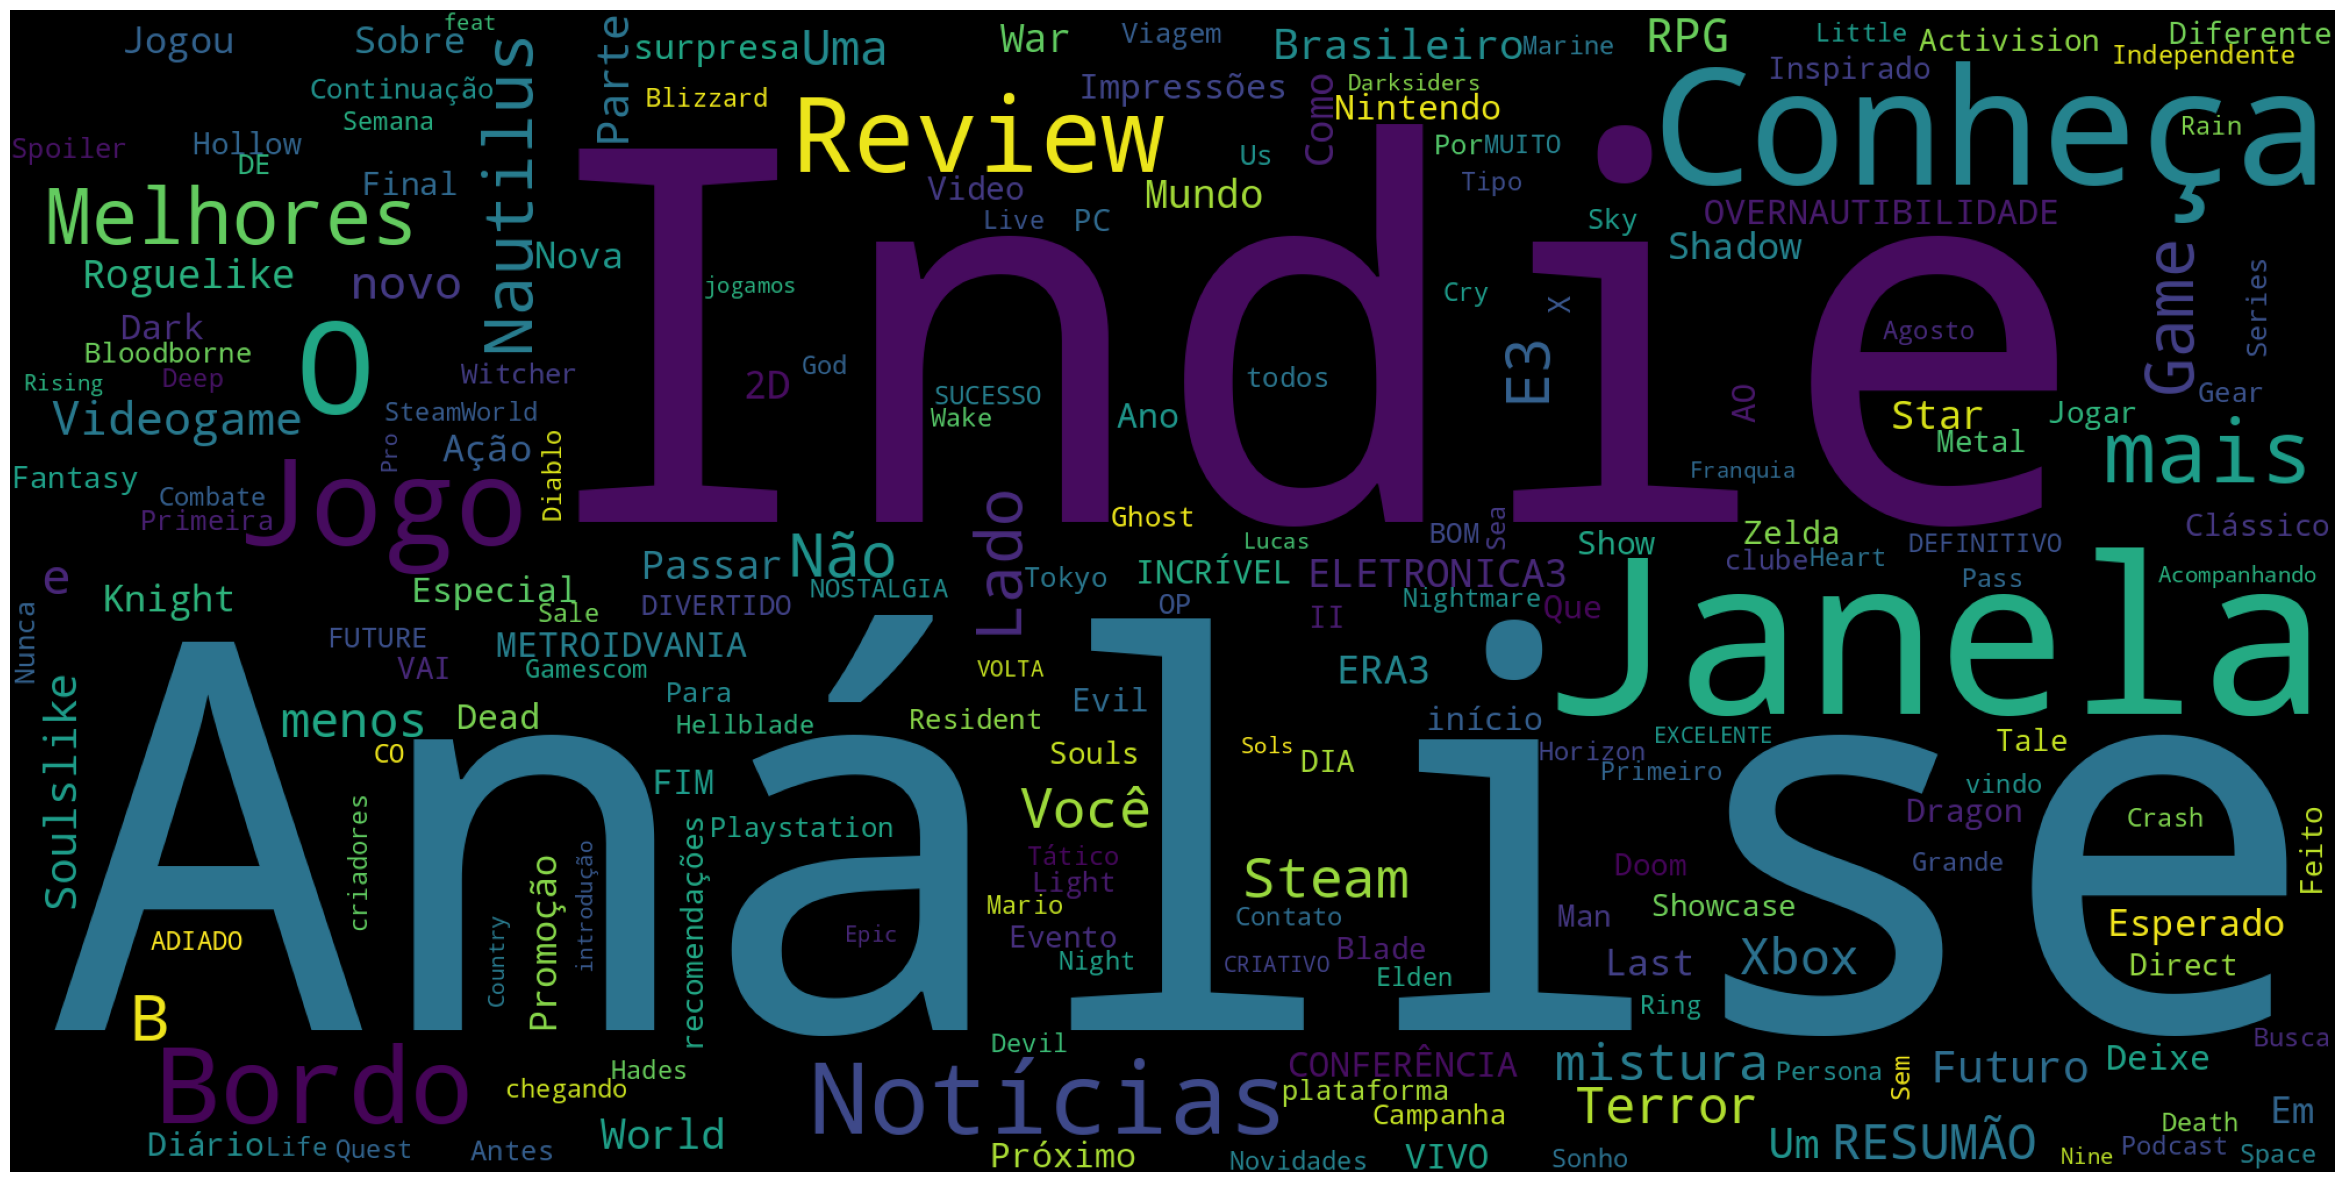

In [ ]:


# Criação de nuvem de palavras


stop_words = set(stopwords.words('portuguese'))

videos_nautilus['title_no_stopwords'] = videos_nautilus['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in videos_nautilus['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black',
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

In [ ]:
import numpy as np
from PIL import Image
naut_mask = np.array(Image.open("LOGO.png"))
naut_mask

array([[[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       ...,

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]],

       [[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        ...,
        [0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]]], dtype=uint8)

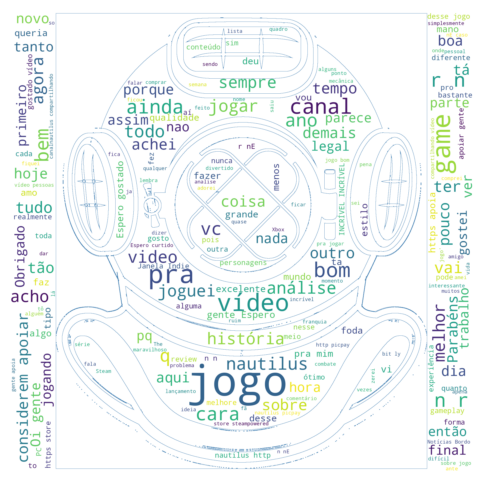

In [ ]:

# Criar a nuvem de palavras
wordcloud = WordCloud(width=800,
                      height=400,
                      background_color='white',
                      mask=naut_mask,
                      stopwords=stop_words,
                      contour_color='steelblue',
                      contour_width=1).generate(all_words_str_c)

# Exibir a nuvem de palavras
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Não mostrar os eixos
plt.show()

In [ ]:
days_of_the_week = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

def daynumber(row):
    if (row['pushblishDayName'] == days_of_the_week[0]):
        return 1
    elif (row['pushblishDayName'] == days_of_the_week[1]):
        return 2
    elif (row['pushblishDayName'] == days_of_the_week[2]):
        return 3
    elif (row['pushblishDayName'] == days_of_the_week[3]):
        return 4
    elif (row['pushblishDayName'] == days_of_the_week[4]):
        return 5
    elif (row['pushblishDayName'] == days_of_the_week[5]):
        return 6
    elif (row['pushblishDayName'] == days_of_the_week[6]):
        return 7
    else:
        return 0

videos_nautilus['weekday'] = videos_nautilus.apply(daynumber, axis=1)

videos_nautilus['weekday']

,weekday
0,4
1,2
2,6
3,3
4,5
...,...
805,7
806,4
807,5
808,4


In [ ]:
top10_view = videos_nautilus.nlargest(10, 'viewCount')
top10_view



,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,...,definition,caption,pushblishDayName,durationSecs,tagsCount,likeRatio,commentRatio,titleLength,title_no_stopwords,weekday
628,628,Bndgggx480A,Nautilus,Animando o Passado em Cuphead,CUPOM KASPERSKY (30% OFF): NAUTILUS \nLINK: ht...,"['Cuphead', 'run', 'gun', 'gunner', 'runner', ...",2017-10-05 23:48:18+00:00,1284508.0,69472.0,NaN,...,hd,True,Thursday,0 days 00:09:55,38,54.084521,1.424670,29,"[Animando, Passado, Cuphead]",5
714,714,hTKtrjss-bg,Nautilus,A Genialidade Distorcida de Bloodborne,CUPOM KASPERSKY (30% OFF): NAUTILUS \nLINK: ht...,"['Bloodborne', 'Melhor', 'Jogo', 'Souls', 'Sér...",2017-01-21 11:10:44+00:00,414194.0,34963.0,NaN,...,hd,False,Saturday,0 days 00:11:20,43,84.412135,2.107708,38,"[A, Genialidade, Distorcida, Bloodborne]",7
701,701,FXXsQBW_CXg,Nautilus,Hollow Knight - Análise,CUPOM KASPERSKY (30% OFF): NAUTILUS \nLINK: ht...,"['análise', 'Hollow Knight', 'review', 'analis...",2017-03-03 20:24:41+00:00,286915.0,21836.0,NaN,...,hd,False,Friday,0 days 00:11:51,21,76.106164,2.380496,23,"[Hollow, Knight, -, Análise]",6
460,460,2BP8s-4Vhm8,Nautilus,Remnant: From The Ashes - A Maior Surpresa de ...,CUPOM KASPERSKY (30% OFF): NAUTILUS \nLINK: ht...,"['Nautilus', 'jogos', 'jogo', 'game', 'games',...",2019-08-28 00:05:37+00:00,238935.0,17410.0,NaN,...,hd,False,Wednesday,0 days 00:08:28,40,72.865005,2.034026,50,"[Remnant:, From, The, Ashes, -, A, Maior, Surp...",4
794,794,mf-6lFwhijc,Nautilus,O Mundo de Dark Souls,CUPOM KASPERSKY (30% OFF): NAUTILUS \nLINK: ht...,"['Nautilus', 'Sinistro', 'Granja', 'Dark Souls...",2016-04-13 01:37:27+00:00,235579.0,17009.0,NaN,...,hd,True,Wednesday,0 days 00:42:17,25,72.200833,1.638516,21,"[O, Mundo, Dark, Souls]",4
577,577,-467xNf8cbk,Nautilus,Bloodborne e os Limites da Compreensão Humana,CUPOM KASPERSKY (30% OFF): NAUTILUS \nLINK: ht...,"['Bloodborne', 'Cosmicismo', 'Cosmo', 'Cosmos'...",2018-04-26 21:11:26+00:00,226138.0,25237.0,NaN,...,hd,False,Thursday,0 days 00:12:36,31,111.599996,3.294449,45,"[Bloodborne, Limites, Compreensão, Humana]",5
801,801,HFle6qTxb8M,Nautilus,Dragon's Dogma: Dark Arisen - Guia de iniciant...,CUPOM KASPERSKY (30% OFF): NAUTILUS \nLINK: ht...,"['guia', ""dragon's dogma"", 'dragons dogma', 'p...",2016-01-19 05:48:40+00:00,216630.0,12552.0,NaN,...,hd,False,Tuesday,0 days 00:16:07,21,57.942113,2.174214,57,"[Dragon's, Dogma:, Dark, Arisen, -, Guia, inic...",3
455,455,1yYHqLcvWRA,Nautilus,Blasphemous - Análise,CUPOM KASPERSKY (30% OFF): NAUTILUS \nLINK: ht...,"['Nautilus', 'jogos', 'jogo', 'game', 'games',...",2019-09-10 23:15:31+00:00,209239.0,15776.0,NaN,...,hd,False,Tuesday,0 days 00:08:38,39,75.397034,1.973819,21,"[Blasphemous, -, Análise]",3
652,652,0NoUEoUbgL4,Nautilus,JOEL,CUPOM KASPERSKY (30% OFF): NAUTILUS \nLINK: ht...,"['Joel', 'The', 'Last', 'of', 'Us', 'The Last ...",2017-07-19 21:03:23+00:00,184285.0,19625.0,NaN,...,hd,True,Wednesday,0 days 00:12:38,35,106.492661,6.576770,4,[JOEL],4
441,441,nsi4Do0sNK4,Nautilus,Disco Elysium é um RPG completamente único,"Esse vídeo foi patrocinado pela Promobit, uma ...","['Nautilus', 'jogos', 'jogo', 'game', 'games',...",2019-11-08 22:58:54+00:00,180278.0,14401.0,NaN,...,hd,False,Friday,0 days 00:08:39,47,79.882182,2.008010,42,"[Disco, Elysium, RPG, completamente, único]",6


In [ ]:
top10_likes = videos_nautilus.nlargest(10, 'likeCount')
top10_likes

,Unnamed: 0,video_id,channelTitle,title,description,tags,publishedAt,viewCount,likeCount,favouriteCount,...,definition,caption,pushblishDayName,durationSecs,tagsCount,likeRatio,commentRatio,titleLength,title_no_stopwords,weekday
628,628,Bndgggx480A,Nautilus,Animando o Passado em Cuphead,CUPOM KASPERSKY (30% OFF): NAUTILUS \nLINK: ht...,"['Cuphead', 'run', 'gun', 'gunner', 'runner', ...",2017-10-05 23:48:18+00:00,1284508.0,69472.0,NaN,...,hd,True,Thursday,0 days 00:09:55,38,54.084521,1.424670,29,"[Animando, Passado, Cuphead]",5
714,714,hTKtrjss-bg,Nautilus,A Genialidade Distorcida de Bloodborne,CUPOM KASPERSKY (30% OFF): NAUTILUS \nLINK: ht...,"['Bloodborne', 'Melhor', 'Jogo', 'Souls', 'Sér...",2017-01-21 11:10:44+00:00,414194.0,34963.0,NaN,...,hd,False,Saturday,0 days 00:11:20,43,84.412135,2.107708,38,"[A, Genialidade, Distorcida, Bloodborne]",7
577,577,-467xNf8cbk,Nautilus,Bloodborne e os Limites da Compreensão Humana,CUPOM KASPERSKY (30% OFF): NAUTILUS \nLINK: ht...,"['Bloodborne', 'Cosmicismo', 'Cosmo', 'Cosmos'...",2018-04-26 21:11:26+00:00,226138.0,25237.0,NaN,...,hd,False,Thursday,0 days 00:12:36,31,111.599996,3.294449,45,"[Bloodborne, Limites, Compreensão, Humana]",5
579,579,r8DQc_3TpcA,Nautilus,A Beleza por trás do Macabro em Bloodborne,CUPOM KASPERSKY (30% OFF): NAUTILUS \nLINK: ht...,"['Bloodborne', 'sony', 'ps4', 'rpg', 'exclusiv...",2018-04-19 20:30:22+00:00,173144.0,22059.0,NaN,...,hd,False,Thursday,0 days 00:13:22,32,127.402624,4.008224,42,"[A, Beleza, trás, Macabro, Bloodborne]",5
701,701,FXXsQBW_CXg,Nautilus,Hollow Knight - Análise,CUPOM KASPERSKY (30% OFF): NAUTILUS \nLINK: ht...,"['análise', 'Hollow Knight', 'review', 'analis...",2017-03-03 20:24:41+00:00,286915.0,21836.0,NaN,...,hd,False,Friday,0 days 00:11:51,21,76.106164,2.380496,23,"[Hollow, Knight, -, Análise]",6
652,652,0NoUEoUbgL4,Nautilus,JOEL,CUPOM KASPERSKY (30% OFF): NAUTILUS \nLINK: ht...,"['Joel', 'The', 'Last', 'of', 'Us', 'The Last ...",2017-07-19 21:03:23+00:00,184285.0,19625.0,NaN,...,hd,True,Wednesday,0 days 00:12:38,35,106.492661,6.576770,4,[JOEL],4
460,460,2BP8s-4Vhm8,Nautilus,Remnant: From The Ashes - A Maior Surpresa de ...,CUPOM KASPERSKY (30% OFF): NAUTILUS \nLINK: ht...,"['Nautilus', 'jogos', 'jogo', 'game', 'games',...",2019-08-28 00:05:37+00:00,238935.0,17410.0,NaN,...,hd,False,Wednesday,0 days 00:08:28,40,72.865005,2.034026,50,"[Remnant:, From, The, Ashes, -, A, Maior, Surp...",4
794,794,mf-6lFwhijc,Nautilus,O Mundo de Dark Souls,CUPOM KASPERSKY (30% OFF): NAUTILUS \nLINK: ht...,"['Nautilus', 'Sinistro', 'Granja', 'Dark Souls...",2016-04-13 01:37:27+00:00,235579.0,17009.0,NaN,...,hd,True,Wednesday,0 days 00:42:17,25,72.200833,1.638516,21,"[O, Mundo, Dark, Souls]",4
455,455,1yYHqLcvWRA,Nautilus,Blasphemous - Análise,CUPOM KASPERSKY (30% OFF): NAUTILUS \nLINK: ht...,"['Nautilus', 'jogos', 'jogo', 'game', 'games',...",2019-09-10 23:15:31+00:00,209239.0,15776.0,NaN,...,hd,False,Tuesday,0 days 00:08:38,39,75.397034,1.973819,21,"[Blasphemous, -, Análise]",3
377,377,7ESblnvofls,Nautilus,Os Melhores Jogos da Década - Nautilus,"Esse vídeo foi patrocinado pela Promobit, uma ...","['Nautilus', 'jogos', 'jogo', 'game', 'games',...",2021-01-07 21:00:04+00:00,135331.0,14973.0,NaN,...,hd,False,Thursday,0 days 00:25:19,47,110.639839,7.027215,38,"[Os, Melhores, Jogos, Década, -, Nautilus]",5


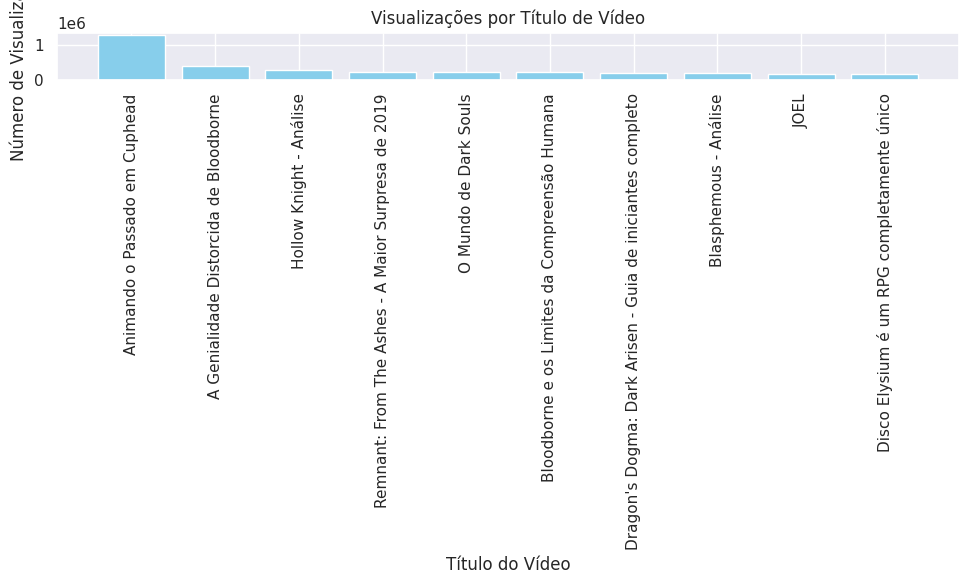

In [ ]:
# Plotar gráfico de barras com título e contagem de visualizações
plt.figure(figsize=(10, 6))  # Ajusta o tamanho da figura

plt.bar(top10_view['title'], top10_view['viewCount'], color='skyblue')

# Adicionar rótulos e título
plt.xlabel('Título do Vídeo')
plt.ylabel('Número de Visualizações')
plt.title('Visualizações por Título de Vídeo')

# Rotacionar os rótulos do eixo X para melhor visualização
plt.xticks(rotation=90)

# Exibir o gráfico
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()

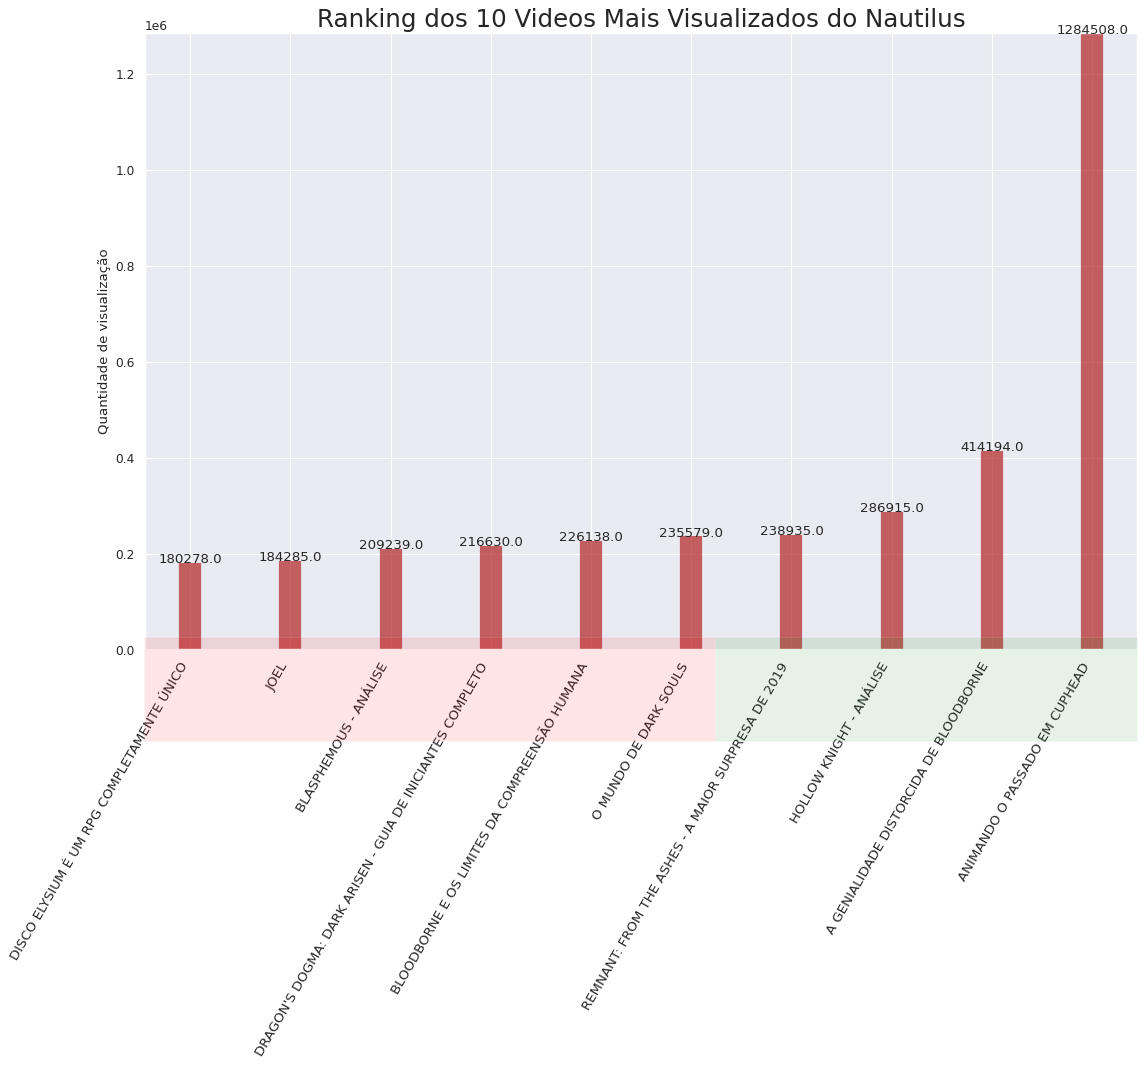

In [ ]:

import matplotlib.patches as patches

df_sorted = top10_view[['viewCount', 'title', 'likeCount']].sort_values('viewCount')

df_sorted.reset_index(drop=True, inplace=True)

# Desenhar o gráfico
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi=80)
ax.vlines(x=df_sorted.index, ymin=0, ymax=df_sorted.viewCount, color='firebrick', alpha=0.7, linewidth=20)

# Adicionar anotações
for i, viewCount in enumerate(df_sorted.viewCount):
    ax.text(i, viewCount + 50, round(viewCount, 1), horizontalalignment='center')

# Título, rótulos, ticks e limites
ax.set_title('Ranking dos 10 Videos Mais Visualizados do Nautilus', fontdict={'size':22})
ax.set(ylabel='Quantidade de visualização', ylim=(0, df_sorted.viewCount.max() + 500))

# Configurar os rótulos do eixo X
plt.xticks(df_sorted.index, df_sorted.title.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

# Adicionar patches coloridos no eixo X (opcional)
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)

# Mostrar o gráfico
plt.show()

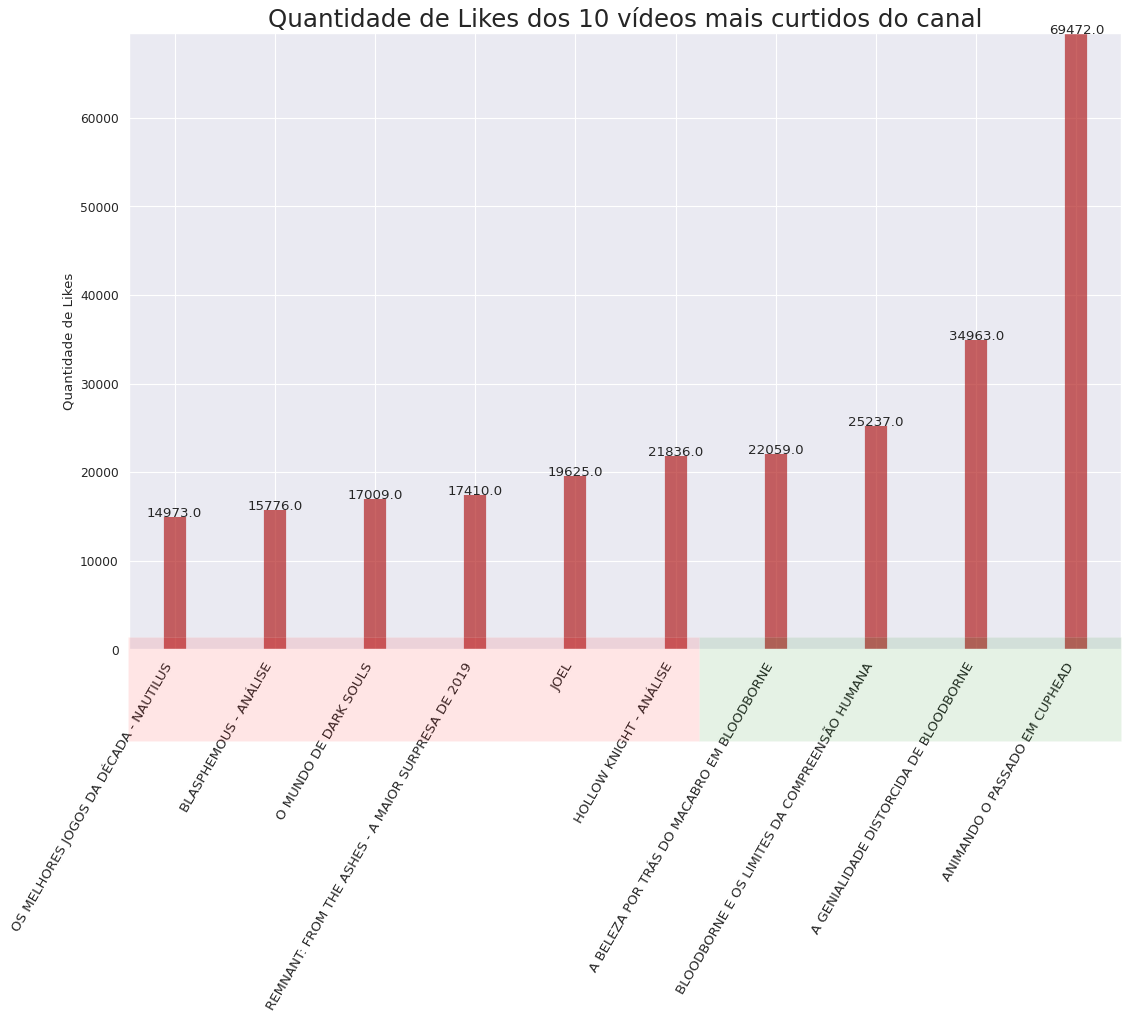

In [ ]:
df_sorted = top10_likes[['viewCount', 'title', 'likeCount']].sort_values('likeCount')
df_sorted.reset_index(drop=True, inplace=True)

# Desenhar o gráfico
fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi=80)
ax.vlines(x=df_sorted.index, ymin=0, ymax=df_sorted.likeCount, color='firebrick', alpha=0.7, linewidth=20)

# Adicionar anotações
for i, likeCount in enumerate(df_sorted.likeCount):
    ax.text(i, likeCount + 10, round(likeCount, 1), horizontalalignment='center')

# Título, rótulos, ticks e limites
ax.set_title('Quantidade de Likes dos 10 vídeos mais curtidos do canal', fontdict={'size':22})
ax.set(ylabel='Quantidade de Likes', ylim=(0, df_sorted.likeCount.max() + 50))

# Configurar os rótulos do eixo X
plt.xticks(df_sorted.index, df_sorted.title.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)

# Adicionar patches coloridos no eixo X (opcional)
p1 = patches.Rectangle((.57, -0.005), width=.33, height=.13, alpha=.1, facecolor='green', transform=fig.transFigure)
p2 = patches.Rectangle((.124, -0.005), width=.446, height=.13, alpha=.1, facecolor='red', transform=fig.transFigure)
fig.add_artist(p1)
fig.add_artist(p2)

# Mostrar o gráfico
plt.show()

In [ ]:
nautilus_cor = videos_nautilus.select_dtypes(include=['number'])
nautilus_cor

,Unnamed: 0,viewCount,likeCount,favouriteCount,commentCount,tagsCount,likeRatio,commentRatio,titleLength,weekday
0,0,15886.0,2349.0,NaN,50.0,20,147.866046,3.147425,64,4
1,1,2805.0,151.0,NaN,0.0,16,53.832442,0.000000,66,2
2,2,13208.0,1450.0,NaN,41.0,36,109.781950,3.104179,70,6
3,3,12641.0,1709.0,NaN,137.0,27,135.195000,10.837750,33,3
4,4,12103.0,1807.0,NaN,56.0,38,149.301826,4.626952,88,5
...,...,...,...,...,...,...,...,...,...,...
805,805,16913.0,1111.0,NaN,29.0,16,65.689115,1.714657,40,7
806,806,66017.0,4709.0,NaN,88.0,19,71.330112,1.332990,40,4
807,807,13130.0,1431.0,NaN,60.0,18,108.987053,4.569688,59,5
808,808,7028.0,534.0,NaN,18.0,34,75.981787,2.561184,84,4


             Unnamed: 0  viewCount  likeCount  tagsCount  titleLength  \
Unnamed: 0     1.000000   0.089000   0.052476  -0.104496    -0.607543   
viewCount      0.089000   1.000000   0.925171   0.130518    -0.128463   
likeCount      0.052476   0.925171   1.000000   0.190958    -0.154496   
tagsCount     -0.104496   0.130518   0.190958   1.000000     0.042695   
titleLength   -0.607543  -0.128463  -0.154496   0.042695     1.000000   
weekday        0.035773   0.076675   0.090598  -0.027680    -0.050023   

              weekday  
Unnamed: 0   0.035773  
viewCount    0.076675  
likeCount    0.090598  
tagsCount   -0.027680  
titleLength -0.050023  
weekday      1.000000  


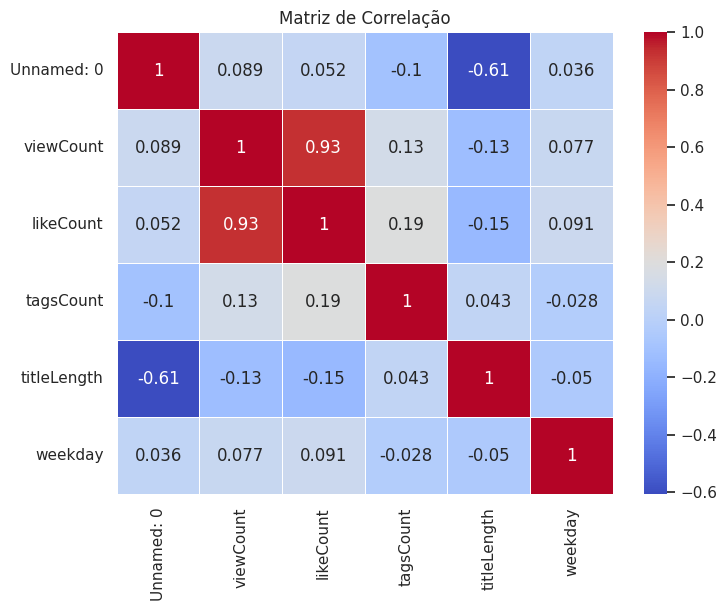

In [ ]:
nautilus_cor = nautilus_cor.dropna(axis=1)

correlation_matrix = nautilus_cor.corr()

# Exibe a matriz de correlação
print(correlation_matrix)

# Plotar um heatmap (mapa de calor) para visualizar a matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

Pode-se perceber que as variáveis com mais correlação entre si são **viewCount, likeCount, commentCount**.

Tamanho do título não parece ter correlação significativa com nenhuma varíavel, apenas com **tagsCount**, que faz sentido, pois quanto maior o título, mais tags a respeito terão.

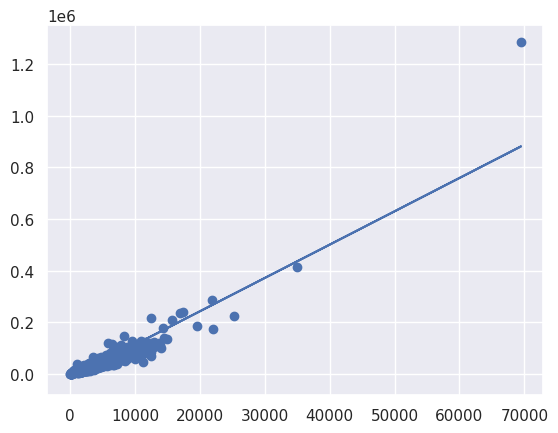

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats

x = videos_nautilus['likeCount']
y = videos_nautilus['viewCount']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [ ]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

print(r)

0.9251707539117797


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Separando as variáveis dependentes (X) e a variável alvo (y)
X = videos_nautilus[['likeCount','weekday']]
y = videos_nautilus['viewCount']

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=48)
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo com erro quadrático médio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 147605029.7347512
Root Mean Squared Error: 12149.28103777138


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Lista de modelos a serem testados
models = {
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=1000, random_state=48),
    "Support Vector Regressor": SVR(kernel='rbf')
}

# Loop pelos modelos para treinar e avaliar
for model_name, model in models.items():
    # Treinando o modelo
    model.fit(X_train, y_train)

    # Fazendo previsões
    y_pred = model.predict(X_test)

    # Avaliando o modelo com erro quadrático médio (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model_name} Mean Squared Error: {mse}")
    rmse = np.sqrt(mse)
    print(f"Root Mean Squared Error: {rmse}")

Gradient Boosting Mean Squared Error: 167060813.18511453
Root Mean Squared Error: 12925.200701927786
Support Vector Regressor Mean Squared Error: 818219202.024304
Root Mean Squared Error: 28604.531144983026


<Figure size 1600x800 with 0 Axes>

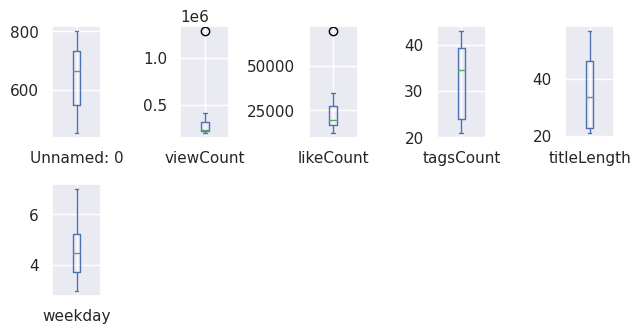

In [ ]:
plt.figure(figsize=(16, 8))  # Ajuste largura e altura conforme necessário
nautilus_cor.plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False)
plt.tight_layout()  # Ajusta automaticamente o layout para caber melhor na figura
plt.show()

<Axes: >

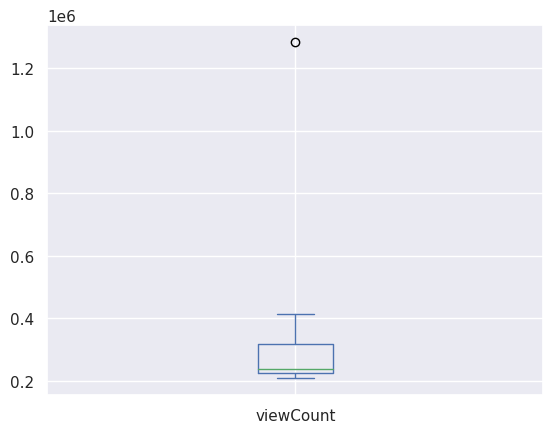

In [ ]:
nautilus_cor['viewCount'].plot(kind='box')


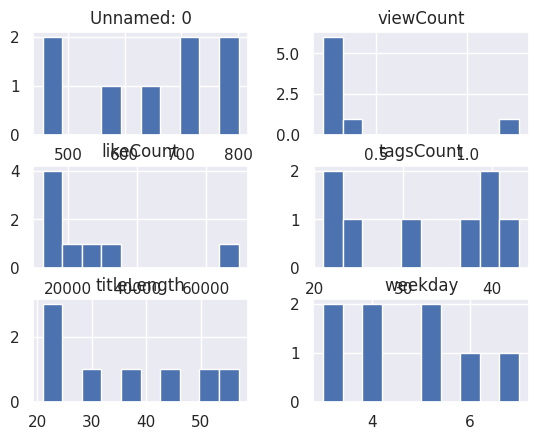

In [ ]:
nautilus_cor.hist()
plt.show()

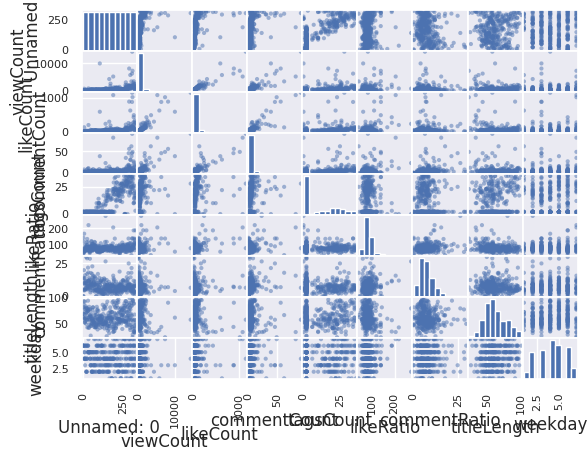

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(nautilus_cor)
plt.show()

In [ ]:
nautilus_cor = nautilus_cor[nautilus_cor['viewCount'] > 200000]

nautilus_cor

,Unnamed: 0,viewCount,likeCount,tagsCount,titleLength,weekday
455,455,209239.0,15776.0,39,21,3
460,460,238935.0,17410.0,40,50,4
577,577,226138.0,25237.0,31,45,5
628,628,1284508.0,69472.0,38,29,5
701,701,286915.0,21836.0,21,23,6
714,714,414194.0,34963.0,43,38,7
794,794,235579.0,17009.0,25,21,4
801,801,216630.0,12552.0,21,57,3


             Unnamed: 0  viewCount  likeCount  tagsCount  titleLength  \
Unnamed: 0     1.000000   0.011531  -0.010399  -0.639273     0.015138   
viewCount      0.011531   1.000000   0.970997   0.322850    -0.195213   
likeCount     -0.010399   0.970997   1.000000   0.407221    -0.191078   
tagsCount     -0.639273   0.322850   0.407221   1.000000    -0.004531   
titleLength    0.015138  -0.195213  -0.191078  -0.004531     1.000000   
weekday        0.213871   0.263679   0.441927   0.212427    -0.154927   

              weekday  
Unnamed: 0   0.213871  
viewCount    0.263679  
likeCount    0.441927  
tagsCount    0.212427  
titleLength -0.154927  
weekday      1.000000  


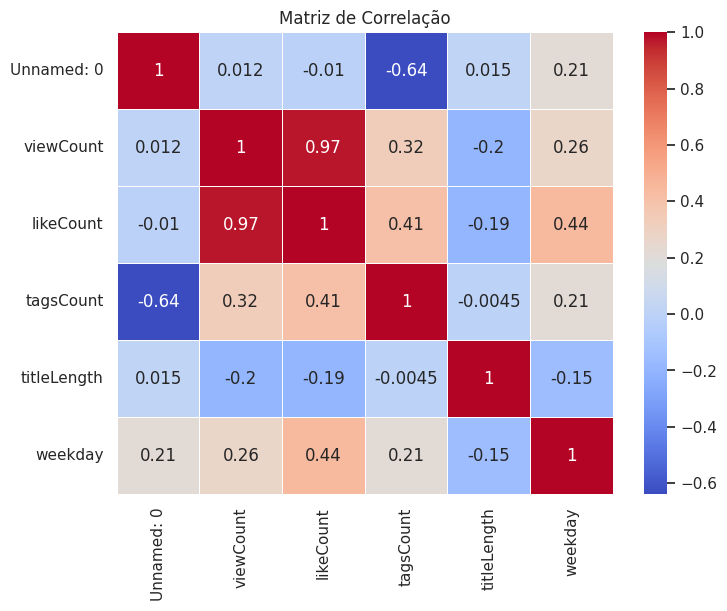

In [ ]:
correlation_matrix = nautilus_cor.corr()

# Exibe a matriz de correlação
print(correlation_matrix)

# Plotar um heatmap (mapa de calor) para visualizar a matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

<Axes: >

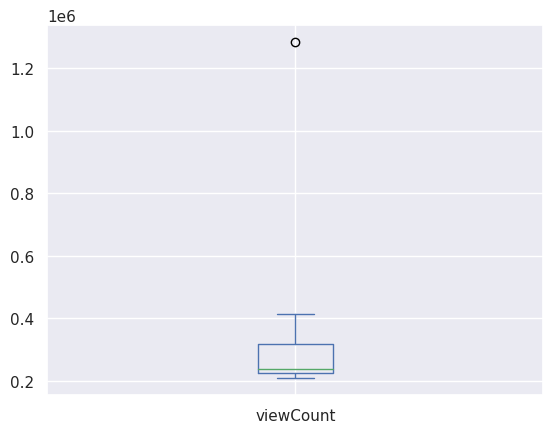

In [ ]:
nautilus_cor['viewCount'].plot(kind='box')

# Observações



# Referências

Links:

https://www.w3schools.com/python/python_ml_linear_regression.asp

https://machinelearningmastery.com/machine-learning-in-python-step-by-step/

